# Notebook to run the full selection using the new data loader class

##### Import the data loader

In [1]:
import sys
sys.path.append("../../../old_notebooks")
sys.path.append("../../../")

# Import the data loader
%load_ext autoreload
%autoreload 2
import data_loading as dl
from importlib import reload
reload(dl)
import pandas as pd

##### Import the selection algorithms and plotter objects

In [2]:
from unblinding_far_sideband import *
import localSettings as ls
import plotter

##### Load the data and create the plotter object

In [3]:
# Remove the load_lee flag to disable adding the LEE prediction
RUN = [1,2,3]
samples,weights,data_pot = dl.load_runs(
 RUN,
    data="bnb",
    truth_filtered_sets=["nue","drt"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_lee=True,
    blinded=False,
    enable_cache=False,
    loadnumuvariables=True
)

pl = plotter.Plotter(samples,weights,data_pot)

/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


../../../data_loading.py:1065: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../../data_loading.py:1065: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../../data_loading.py:581: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../../data_loading.py:581: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


../../../data_loading.py:744: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot / mc_p_prot, np.nan)


Loading lee sample


../../../data_loading.py:1100: RuntimeWarning: invalid value encountered in sqrt
  - reco_pz_hadsum * reco_pz_hadsum


Loading lee sample
Loading lee sample


../../../old_notebooks/plotter.py:290: UserWarning: Missing dirt sample
  warnings.warn("Missing dirt sample")


##### Draw the plot!

Error calculating the significance operands could not be broadcast together with shapes (10,) (9,) (10,) 


../../../old_notebooks/plotter.py:316: RuntimeWarning: invalid value encountered in true_divide
  return (data-mc)**2 / data
../../../old_notebooks/plotter.py:312: RuntimeWarning: invalid value encountered in true_divide
  return (data-mc)**2 / mc


Error calculating the significance operands could not be broadcast together with shapes (20,) (19,) (20,) 


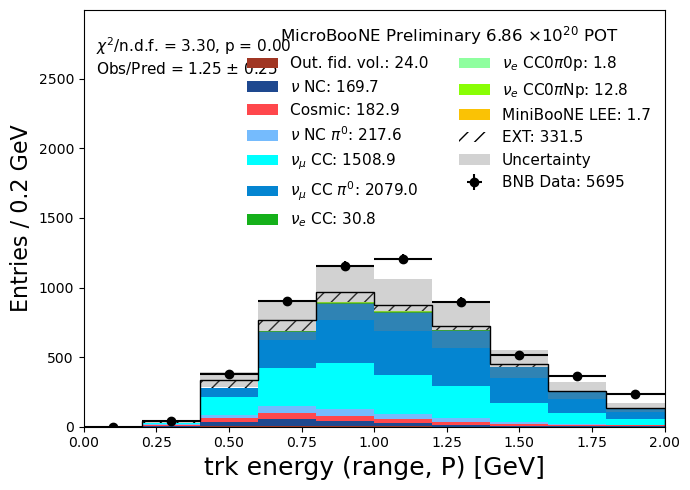

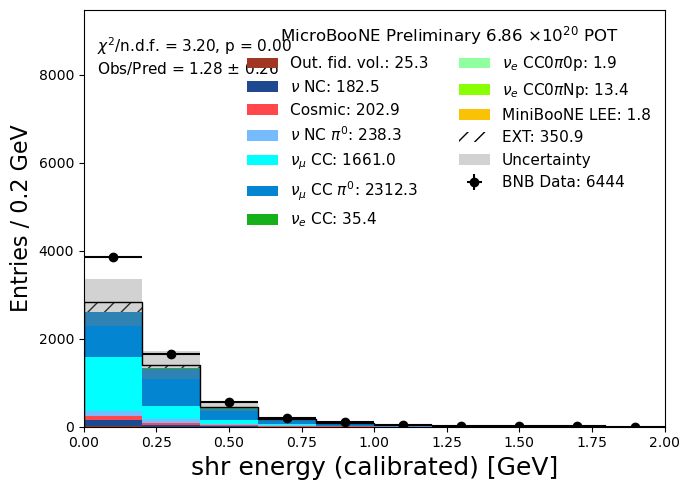

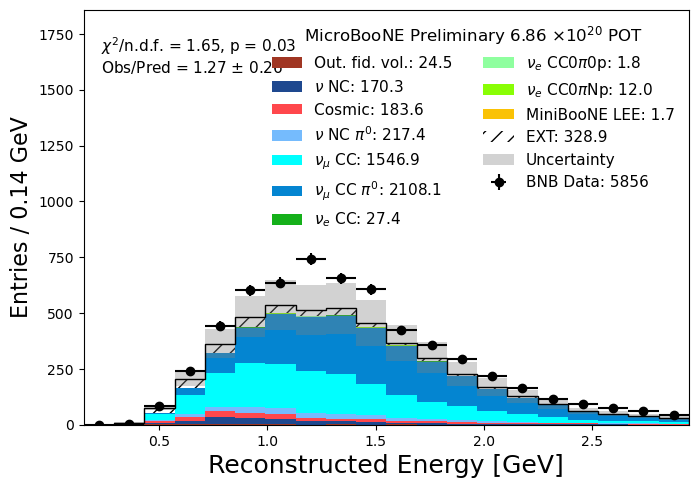

In [5]:
from microfit import variable_definitions as vdef    

# choose sideband, preselection, and selection
# find defintions in unblinding_far_sideband.py
sdb_key = 'None' #'None'
pre_key = 'NUMU'
sel_key = 'NUMU'
run = 123
variables = vdef.energy_variables

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])
DETSYS = {'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
          'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False}


QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
        
#formatting can be improved..
TITLE = ""

for binning_def in variables:    
    
    VARIABLE, BINS, RANGE, XTIT = binning_def[0],binning_def[1],binning_def[2],binning_def[3]
    
    fig, ax1, ax2 = pl.plot_variable(
        VARIABLE,   
        query=QUERY,
        kind="event_category",
        #kind="paper_category",
        draw_sys=True,
        detsysdict=DETSYS,
        DETSYSPATH=DETSYSPATH,
        COVMATRIX="",#'cov_matrix_Enu_reco_1eNp.txt',
        ratio=False,
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE,
        chisq=True,
        draw_data=True
        #asymErrs=True
    )[0:3]

    ax1.set_title(TITLE, loc='left')
    ax1.set_ylim(0., ax1.get_ylim()[1]*2.3)